<a href="https://colab.research.google.com/github/ShivaniKamal/Coke-Sales-Insights/blob/main/ChatGPT_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

from nltk.corpus import stopwords
from nltk import bigrams
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')


from google.colab import files
uploaded = files.upload()


import pandas as pd
df = pd.read_csv("chatgpt_reviews (1).csv")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving chatgpt_reviews (1).csv to chatgpt_reviews (1) (1).csv


In [ ]:
df = pd.read_csv('chatgpt_reviews (1).csv')
df.head()

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [ ]:
df.isnull().sum()


,0
Review Id,0
Review,6
Ratings,0
Review Date,0


In [ ]:
df['Review'] = df['Review'].fillna("No Review")


In [ ]:
df.isnull().sum()


,0
Review Id,0
Review,0
Ratings,0
Review Date,0


In [ ]:
df.dtypes


,0
Review Id,object
Review,object
Ratings,int64
Review Date,object


In [ ]:

df["polarity"] = df["Review"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

In [ ]:
df["Review Date"] = pd.to_datetime(df["Review Date"], errors="coerce")



In [ ]:
df.dtypes


,0
Review Id,object
Review,object
Ratings,int64
Review Date,datetime64[ns]
polarity,float64


In [ ]:
def get_sentiment(score):
    if score > 0:
        return "Positive"
    elif score == 0:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["polarity"].apply(get_sentiment)

df[["Review", "polarity", "subjectivity", "sentiment"]].head()

,Review,polarity,sentiment
0,good,0.7000,Positive
1,good,0.7000,Positive
2,nice app,0.6000,Positive
3,"nice, ig",0.6000,Positive
4,"this is a great app, the bot is so accurate to...",0.4125,Positive


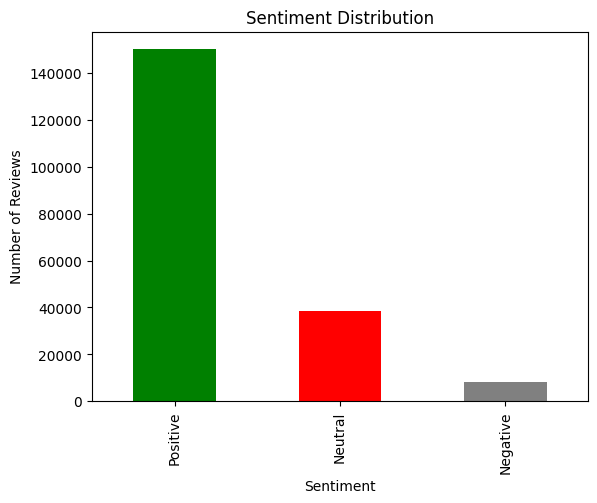

In [ ]:
df['sentiment'].value_counts().plot(kind ='bar',color=['Green','red','gray'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [ ]:
positive_reviews = df[df['polarity'] > 0]['Review']


In [ ]:
positive_reviews = df[df['Ratings'] >= 4]

In [ ]:
print("Total reviews:", df.shape[0])
print("Positive reviews:", positive_reviews.shape[0])


Total reviews: 196727
Positive reviews: 173112


In [ ]:
stop_words = set(stopwords.words("english"))
all_words = []

for review in positive_reviews['Review'].dropna():
    words = re.findall(r'\w+', review.lower())  # split into words
    filtered = [w for w in words if w not in stop_words and len(w) > 2]
    all_words.extend(filtered)

In [ ]:
word_counts = Counter(all_words).most_common(20)
print("\nTop Positive Keywords:\n", word_counts)



Top Positive Keywords:
 [('app', 45084), ('good', 35891), ('best', 17955), ('nice', 12976), ('great', 11352), ('helpful', 11248), ('chatgpt', 8922), ('amazing', 8566), ('love', 8444), ('like', 7831), ('useful', 7317), ('really', 6821), ('excellent', 6109), ('use', 5995), ('awesome', 5028), ('chat', 4987), ('gpt', 4258), ('help', 3946), ('ever', 3941), ('much', 3749)]


In [ ]:
from nltk.util import bigrams
all_bigrams = list(bigrams(all_words))
bigram_counts = Counter(all_bigrams).most_common(15)

print("\nTop Positive Phrases:")
for phrase, count in bigram_counts:
    print(" ".join(phrase), ":", count)


Top Positive Phrases:
good app : 5922
best app : 5435
good good : 4286
app good : 3895
nice app : 3317
great app : 3104
chat gpt : 2924
love app : 1862
app best : 1811
app ever : 1760
good nice : 1758
amazing app : 1599
nice good : 1518
app helpful : 1515
good best : 1504


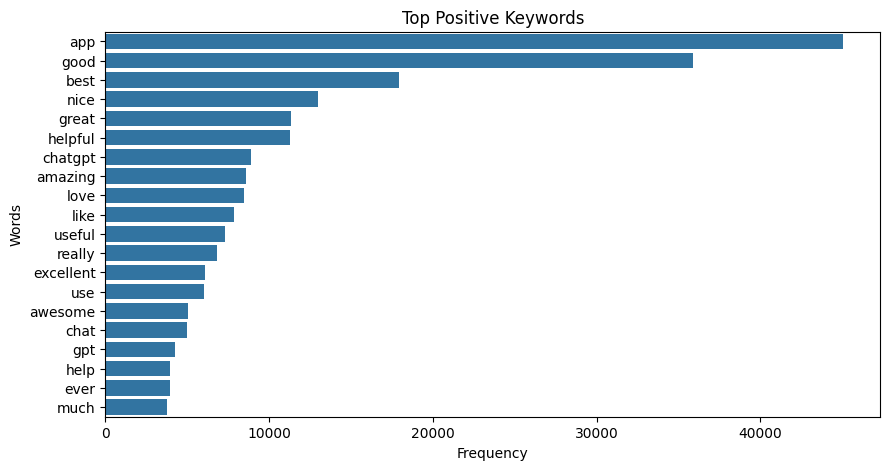

In [ ]:
words = [word for word, count in word_counts]
counts = [count for word, count in word_counts]

plt.figure(figsize=(10,5))  # chart ka size
sns.barplot(x=list(counts), y=list(words))  # horizontal bar chart
plt.title("Top Positive Keywords")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()